Simple Linear Regression Assignment

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import statsmodels.api as sm

In [52]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
df = pd.read_csv(url, sep=r'\s+', names=columns)

# Display the first few rows of the dataset
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


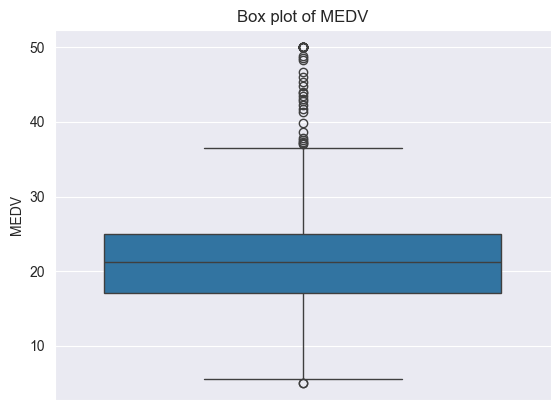

Outliers:
         CRIM    ZN  INDUS  CHAS     NOX     RM    AGE     DIS  RAD    TAX  \
97    0.12083   0.0   2.89     0  0.4450  8.069   76.0  3.4952    2  276.0   
98    0.08187   0.0   2.89     0  0.4450  7.820   36.9  3.4952    2  276.0   
157   1.22358   0.0  19.58     0  0.6050  6.943   97.4  1.8773    5  403.0   
161   1.46336   0.0  19.58     0  0.6050  7.489   90.8  1.9709    5  403.0   
162   1.83377   0.0  19.58     1  0.6050  7.802   98.2  2.0407    5  403.0   
163   1.51902   0.0  19.58     1  0.6050  8.375   93.9  2.1620    5  403.0   
166   2.01019   0.0  19.58     0  0.6050  7.929   96.2  2.0459    5  403.0   
179   0.05780   0.0   2.46     0  0.4880  6.980   58.4  2.8290    3  193.0   
180   0.06588   0.0   2.46     0  0.4880  7.765   83.3  2.7410    3  193.0   
182   0.09103   0.0   2.46     0  0.4880  7.155   92.2  2.7006    3  193.0   
186   0.05602   0.0   2.46     0  0.4880  7.831   53.6  3.1992    3  193.0   
190   0.09068  45.0   3.44     0  0.4370  6.951   21.5

In [53]:
# Detect outliers using a box plot
sns.boxplot(df['MEDV'])
plt.title('Box plot of MEDV')
plt.show()

# Identify outliers
Q1 = df['MEDV'].quantile(0.25)
Q3 = df['MEDV'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['MEDV'] < lower_bound) | (df['MEDV'] > upper_bound)]
print(f"Outliers:\n{outliers}")

# Optionally, remove outliers
df_cleaned = df[~((df['MEDV'] < lower_bound) | (df['MEDV'] > upper_bound))]

Mean Price: 22.532806324110677
Median Price: 21.2
Mode Price: 50.0


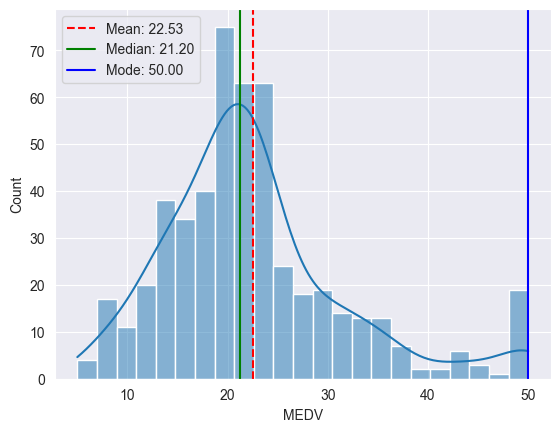

In [54]:
# Calculate measures of central tendency
mean_price = df['MEDV'].mean()
median_price = df['MEDV'].median()
mode_price = df['MEDV'].mode()[0]

# Display the results
print(f"Mean Price: {mean_price}")
print(f"Median Price: {median_price}")
print(f"Mode Price: {mode_price}")

# Visualization of central tendency
sns.histplot(df['MEDV'], kde=True)
plt.axvline(mean_price, color='r', linestyle='--', label=f'Mean: {mean_price:.2f}')
plt.axvline(median_price, color='g', linestyle='-', label=f'Median: {median_price:.2f}')
plt.axvline(mode_price, color='b', linestyle='-', label=f'Mode: {mode_price:.2f}')
plt.legend()
plt.show()

Range Price: 45.0
Variance Price: 84.5867235940986
Standard Deviation Price: 9.19710408737982


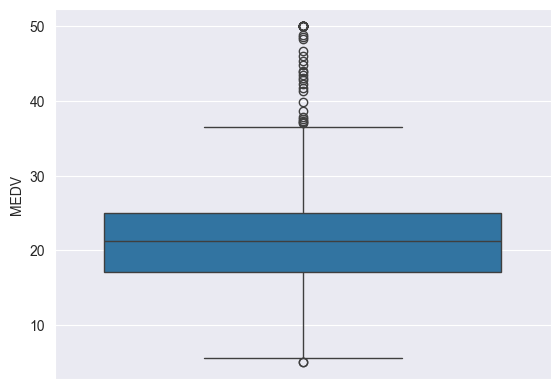

In [55]:
# Calculate measures of dispersion
range_price = df['MEDV'].max() - df['MEDV'].min()
variance_price = df['MEDV'].var()
std_dev_price = df['MEDV'].std()

# Display the results
print(f"Range Price: {range_price}")
print(f"Variance Price: {variance_price}")
print(f"Standard Deviation Price: {std_dev_price}")

# Visualization of dispersion
sns.boxplot(df['MEDV'])
plt.show()

Skewness: 1.104810822864635
Kurtosis: 1.4686287722747462


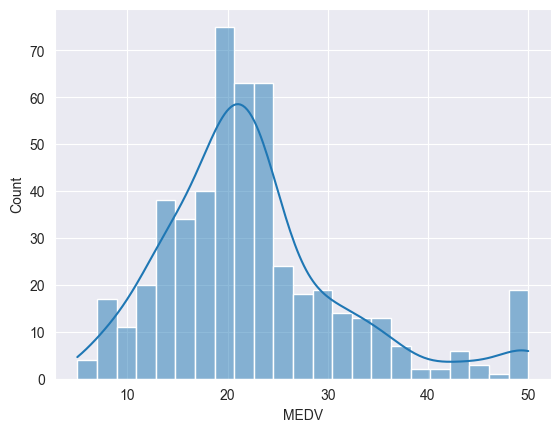

In [56]:
# Calculate skewness and kurtosis
skewness = skew(df['MEDV'])
kurt = kurtosis(df['MEDV'])

# Display the results
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")

# Visualization of skewness and kurtosis
sns.histplot(df['MEDV'], kde=True)
plt.show()

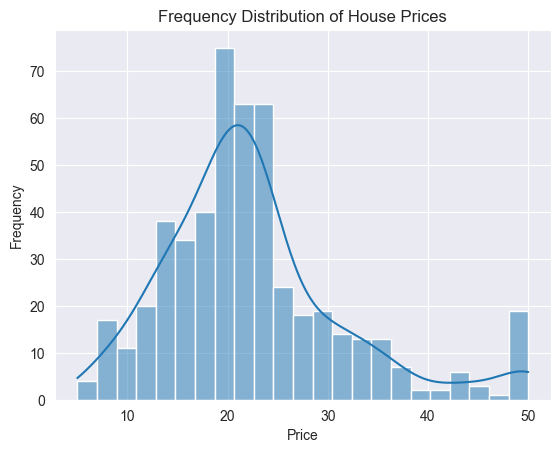

In [57]:
# Histogram
sns.histplot(df['MEDV'], kde=True)
plt.title('Frequency Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 24 Jul 2024   Prob (F-statistic):           2.49e-74
Time:                        19:00:08   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.0

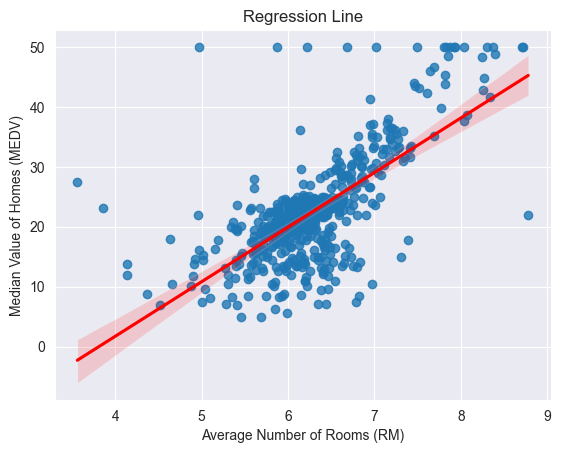

In [58]:
# Perform Simple Linear Regression
# Independent variable
X = df['RM']
# Dependent variable
Y = df['MEDV']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Display the model summary
print(model.summary())

# Plot the regression line
sns.regplot(x='RM', y='MEDV', data=df, line_kws={"color": "red"})
plt.title('Regression Line')
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Median Value of Homes (MEDV)')
plt.show()